<h1>To predict between Buildings and Forest using CNN from complete scratch(No Transfer learning)</h1>

The folder actually contains 6 classes but first I will try with only 2 classes and then with 3 classes due to computational restriction in conversion of images to numpy array

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

from glob import glob
import os

In [2]:
#GeekforGeeks
#For unzipping the images to the drive folder

# from zipfile import ZipFile
  
# # specifying the zip file name
# file_name = "/content/drive/MyDrive/Colab Notebooks/intel image classification/archive.zip"
  
# # opening the zip file in READ mode
# with ZipFile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
  
#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall(path='/content/drive/MyDrive/Colab Notebooks/intel image classification')
#     print('Done!')

In [3]:
#loading and dipalying the image
def display_pic(img_path):
  img1=load_img(img_path)
  plt.imshow(img1)

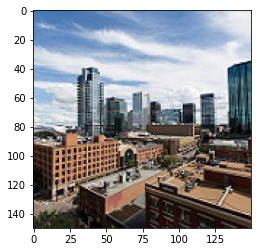

In [4]:
#Image 
img_test_path='/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_train/seg_train/buildings/10006.jpg'
display_pic(img_test_path)

In [5]:
#Number of class labels
train_class=glob('/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_train/seg_train/*')
train_dim=len(train_class)
print(train_dim)

6


In [6]:
#Custom label mapping
labels=['buildings','forest','glacier','mountain','sea','street']

In [7]:
#Converting single image to array
def img2array_forSingle(img_comp_path):
  img_path2=img_comp_path
  img=load_img(img_path2,color_mode='grayscale')
  train_array=img_to_array(img)
  print(train_array.shape)
img2array_forSingle('/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_train/seg_train/mountain/10000.jpg')

(150, 150, 1)


In [8]:
#Function converts image to a numpy array 
def img_array_generator(folder_path):
  train_path=[]
  train_array = []
  train_label=[]
  idx=0
  train_class=glob(folder_path)
  sub_train_class=train_class[0:2] #Selecting only the first two classes of images
  for path in sub_train_class:
    train_path.append(str(path)+"/*.jpg")
  for paths in train_path:
    files = glob(paths)
    for myFile in files:
      img=load_img(myFile,color_mode='grayscale')
      img_array=img_to_array(img)
      if img_array.shape != (150,150,1): #Remove the images whose shape is not equal to the provided shape
        os.remove(myFile)
      else:
        train_array.append(img_array)
        train_label.append(labels[idx])
    idx+=1
  train_data=np.array(train_array)
  train_label=np.array(train_label)
  print(train_data.shape)
  return train_data,train_label

In [9]:
#Image array for training and the corresponding labels
train_data,train_labels=img_array_generator('/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_train/seg_train/*')

(4453, 150, 150, 1)


In [10]:
#Reusing the same function for test data genertor from test images
test_data,test_labels=img_array_generator('/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_test/seg_test/*')

(910, 150, 150, 1)


In [ ]:
# Checking the training img and the label
plt.imshow(train_data[4000].reshape(150,150))
print(train_labels[4000])

In [12]:
#Scaling the train test data
scaled_train=train_data/255
scaled_test=test_data/255

In [13]:
print(f"The shape of training data is {scaled_train.shape}")
print(f"The shape of test data is {scaled_test.shape}")

The shape of training data is (4453, 150, 150, 1)
The shape of test data is (910, 150, 150, 1)


In [14]:
#Buildings=1,forest=0
train_labels=np.where(train_labels=='buildings',1,0)
test_labels=np.where(test_labels=='buildings',1,0)

In [15]:
print(f"The shape of train label is {train_labels.shape}")
print(f"The shape of test label is {test_labels.shape}")

The shape of train label is (4453,)
The shape of test label is (910,)


In [16]:
# Creating a CNN model
model=keras.Sequential()
#Conv layer 1
model.add(keras.layers.Conv2D(filters=300,kernel_size=(3,3),activation='relu',input_shape=(150,150,1)))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))
# Conv layer 2
model.add(keras.layers.Conv2D(filters=300,kernel_size=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()
checkpoint_pt = keras.callbacks.ModelCheckpoint("Image_classification.h5",save_best_only=True) #Using Callback to save the best model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(scaled_train,train_labels,epochs=15,validation_data=(scaled_test,test_labels),callbacks=[checkpoint_pt])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 300)     3000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 300)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 300)       360300    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 300)       0         
_________________________________________________________________
flatten (Flatten)            (None, 172800)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 172801    
Total params: 536,101
Trainable params: 536,101
Non-trainable params: 0
__________________________________________________

In [ ]:
#Loading the best model
model=keras.models.load_model('/content/Image_classification.h5')

In [ ]:
#making predictions on test data
pred=model.predict(scaled_test)

In [ ]:
#Lets check some pictures
img_idx=500
chk_pred=model.predict(scaled_test[img_idx].reshape(1,150,150,1))
pred_label=np.where(chk_pred>=0.5,'Buildings','Forest')
plt.imshow(scaled_test[img_idx].reshape(150,150))
print(pred_label)

array([[1.]], dtype=float32)

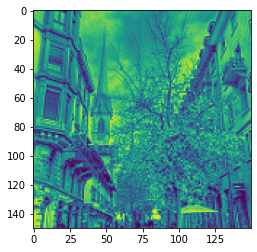

In [20]:
#Lets check with a new little complicated image
img_test=load_img('/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_pred/seg_pred/10004.jpg',color_mode='grayscale')
plt.imshow(img_test)
t1_array=img_to_array(img_test)
model.predict(t1_array.reshape(1,150,150,1))
# It predicts the below image to be of building which is true

<h1> To predict between buildings,forest and glacier

In [ ]:
#Function converts image to a numpy array 
def img_array_generator(folder_path):
  train_path=[]
  train_array = []
  train_label=[]
  idx=0
  train_class=glob(folder_path)
  sub_train_class=train_class[0:3] #Selecting only the first two classes of images
  for path in sub_train_class:
    train_path.append(str(path)+"/*.jpg")
  for paths in train_path:
    files = glob(paths)
    for myFile in files:
      img=load_img(myFile,color_mode='grayscale')
      img_array=img_to_array(img)
      if img_array.shape != (150,150,1): #Remove the images whose shape is not equal to the provided shape
        os.remove(myFile)
      else:
        train_array.append(img_array)
        train_label.append(labels[idx])
    idx+=1
  train_data=np.array(train_array)
  train_label=np.array(train_label)
  print(train_data.shape)
  return train_data,train_label

In [ ]:
#Image array for training and the corresponding labels
train_data,train_labels=img_array_generator('/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_train/seg_train/*')
test_data,test_labels=img_array_generator('/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_test/seg_test/*')

(6840, 150, 150, 1)
(1459, 150, 150, 1)


In [ ]:
#Saving the numpy array
np.save('train_data',train_data)
np.save('test_data',test_data)

In [ ]:
#loading the data from saved numpy file
train_data=np.load('/content/drive/MyDrive/Colab Notebooks/intel image classification/train_data.npy')
test_data=np.load('/content/drive/MyDrive/Colab Notebooks/intel image classification/test_data.npy')

In [ ]:
#Custom function to change the class labels to numbers
# buildings--1
# forest--2
# glacier--3
#Training label
y_train=[]
for i in train_labels:
  if i=='buildings':
    y_train.append(0)
  elif i=='forest':
    y_train.append(1)
  else:
    y_train.append(2)

y_train=np.array(y_train)

#Testing label
y_test=[]
for j in test_labels:
  if j=='buildings':
    y_test.append(0)
  elif j=='forest':
    y_test.append(1)
  else:
    y_test.append(2)

y_test=np.array(y_test)


In [ ]:
#Scaling the train test data
scaled_train=train_data/255
scaled_test=test_data/255

In [ ]:
# Creating a CNN model
model=keras.Sequential()
#Conv layer 1
model.add(keras.layers.Conv2D(filters=300,kernel_size=(3,3),activation='relu',input_shape=(150,150,1)))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))
model.add(keras.layers.Dropout(0.3))
# Conv layer 2
model.add(keras.layers.Conv2D(filters=300,kernel_size=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=3,activation='softmax'))

model.summary() 
checkpoint_pt = keras.callbacks.ModelCheckpoint("Image_classification.h5",save_best_only=True) #Using Callback to save the best model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(scaled_train,y_train,epochs=15,validation_data=(scaled_test,y_test),callbacks=[checkpoint_pt])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 300)     3000      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 300)       0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 300)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 300)       360300    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 300)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 300)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 172800)           

In [ ]:
#loading the saved Best model
model=keras.models.load_model('/content/Image_classification.h5')

array([[1., 0., 0.]], dtype=float32)

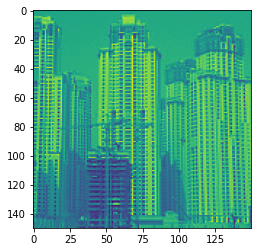

In [ ]:
#Lets check with a new little complicated image
img_test=load_img('/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_pred/seg_pred/11580.jpg',color_mode='grayscale')
plt.imshow(img_test)
t1_array=img_to_array(img_test)
model.predict(t1_array.reshape(1,150,150,1))
# It predicts the below image to be of building which is true